In [2]:
import os
from pathlib import Path
from PIL import Image
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
PRIMUS_TXT_FILES = Path('/home/macosta/ttmp/primus-data/primus-semantic/semantic-cleaned-v2/')

In [4]:
word_dict = {}

In [11]:
for filepath in tqdm(os.listdir(PRIMUS_TXT_FILES)):
    with open(PRIMUS_TXT_FILES / filepath, 'r') as f:
        text = f.read()
    words = text.split()
    for word in words:
        if word not in word_dict:
            word_dict[word] = 1
        else:
            word_dict[word] += 1

100%|██████████████████████████████████| 87678/87678 [00:03<00:00, 26191.39it/s]


In [12]:
word_dict_sorted = sorted(word_dict.items(), key=lambda x: -x[1])

In [13]:
len(word_dict_sorted)

279

In [7]:
val = np.arange(len(word_dict_sorted))
weight = [pair[1] for pair in word_dict_sorted]

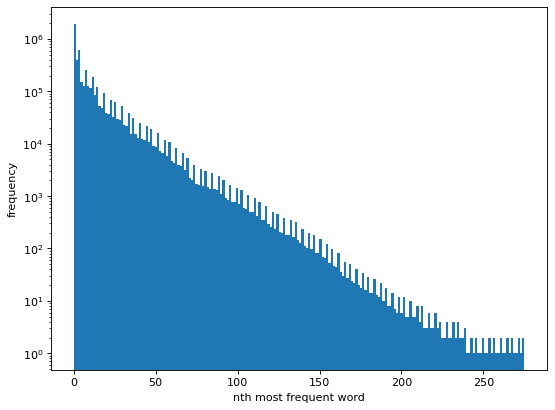

In [8]:
figure(figsize=(8, 6), dpi=80)
plt.hist(val, weights=weight, log=True, bins=200)
plt.xlabel('nth most frequent word')
plt.ylabel('frequency')
plt.show()

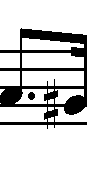

In [32]:
token = word_dict_sorted[-1][0]
cols = token.split('_')
arr = np.zeros((len(cols[0]), len(cols)))
for i, col in enumerate(cols):
    arr[:,i] = [1-int(x) for x in col]
Image.fromarray(arr * 255).show()